## In this Notebook

- **Does time of day affect arrest rate?**
- **Are drug-related stops on the rise?**
- **What violations are caught in each district?**
- **How long might you be stopped for a violation?**

#### Importing the Prepared Dataset

In [1]:
#importing the pandas library to handle actions on the dataframe
import pandas as pd

#importing the prepared datset
RI_traffic_prepd = pd.read_csv("RI_traffic_prepped.csv")
RI_traffic_prepd.drop('Unnamed: 0', axis='columns', inplace=True)
RI_traffic_prepd.head()

,driver_gender,driver_race,violation_raw,violation,search_conducted,stop_outcome,is_arrested,stop_duration,drugs_related_stop,district,date_time_stop
0,M,White,Equipment/Inspection Violation,Equipment,False,Citation,False,0-15 Min,False,Zone X4,2005-01-04 12:55:00
1,M,White,Speeding,Speeding,False,Citation,False,0-15 Min,False,Zone K3,2005-01-23 23:15:00
2,M,White,Speeding,Speeding,False,Citation,False,0-15 Min,False,Zone X4,2005-02-17 04:15:00
3,M,White,Call for Service,Other,False,Arrest Driver,True,16-30 Min,False,Zone X1,2005-02-20 17:15:00
4,F,White,Speeding,Speeding,False,Citation,False,0-15 Min,False,Zone X3,2005-02-24 01:20:00


In [2]:
#setting the format to the datetime field appropriately
format = '%Y-%m-%d %H:%M:%S'

In [3]:
#ensuring the date time field is at the appropriate format
datetimecolumn = pd.to_datetime(RI_traffic_prepd["date_time_stop"], format=format)
datetimecolumn.shape

(91741,)

In [4]:
#setting the formated datetime column to the index
RI_traffic_prepd = RI_traffic_prepd.set_index(pd.DatetimeIndex(RI_traffic_prepd["date_time_stop"]))
RI_traffic_prepd.head()

,driver_gender,driver_race,violation_raw,violation,search_conducted,stop_outcome,is_arrested,stop_duration,drugs_related_stop,district,date_time_stop
date_time_stop,,,,,,,,,,,
2005-01-04 12:55:00,M,White,Equipment/Inspection Violation,Equipment,False,Citation,False,0-15 Min,False,Zone X4,2005-01-04 12:55:00
2005-01-23 23:15:00,M,White,Speeding,Speeding,False,Citation,False,0-15 Min,False,Zone K3,2005-01-23 23:15:00
2005-02-17 04:15:00,M,White,Speeding,Speeding,False,Citation,False,0-15 Min,False,Zone X4,2005-02-17 04:15:00
2005-02-20 17:15:00,M,White,Call for Service,Other,False,Arrest Driver,True,16-30 Min,False,Zone X1,2005-02-20 17:15:00
2005-02-24 01:20:00,F,White,Speeding,Speeding,False,Citation,False,0-15 Min,False,Zone X3,2005-02-24 01:20:00


In [5]:
#checking the datatype of index
RI_traffic_prepd.index.dtype

dtype('<M8[ns]')

### Does the time of day affect arrest rate?

In [6]:
#the overall arrest rate
print(RI_traffic_prepd.is_arrested.mean())

#the montly arrest rate
print(RI_traffic_prepd.groupby(RI_traffic_prepd.index.year).is_arrested.mean())

# the montly arrest rate
hourly_arrest_rate = RI_traffic_prepd.groupby(RI_traffic_prepd.index.year).is_arrested.mean()

0.09025408486936048
date_time_stop
2005    0.081470
2006    0.091004
2007    0.088042
2008    0.094582
2009    0.117647
2010    0.103083
2011    0.105650
2012    0.085490
2013    0.089826
2014    0.067508
2015    0.068580
Name: is_arrested, dtype: float64


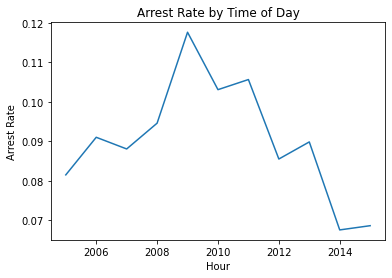

In [7]:
#import the matplotlib library
import matplotlib.pyplot as plt

#line plot of 'hourly_arrest_rate'
hourly_arrest_rate.plot()

#xlabel, ylabel, and title
plt.xlabel('Hour')
plt.ylabel('Arrest Rate')
plt.title('Arrest Rate by Time of Day')

#the plot
plt.show()

### Are drug-related stops on the rise?

date_time_stop
2005-12-31    0.006390
2006-12-31    0.006913
2007-12-31    0.007520
2008-12-31    0.006998
2009-12-31    0.009079
2010-12-31    0.009407
2011-12-31    0.009035
2012-12-31    0.009388
2013-12-31    0.012283
2014-12-31    0.013280
2015-12-31    0.011787
Freq: A-DEC, Name: drugs_related_stop, dtype: float64


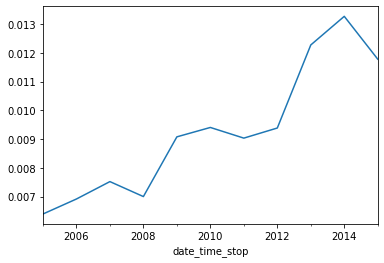

In [8]:
#the annual rate of drug-related stops
print(RI_traffic_prepd.drugs_related_stop.resample('A').mean())

#the annual rate of drug-related stops
annual_drug_rate = RI_traffic_prepd.drugs_related_stop.resample('A').mean()

#line plot of 'annual_drug_rate'
annual_drug_rate.plot()

#the plot
plt.show()

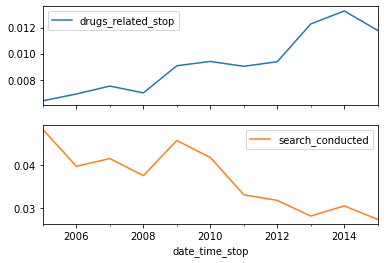

In [9]:
#the annual search rate
annual_search_rate = RI_traffic_prepd.search_conducted.resample('A').mean()

#'annual_drug_rate' and 'annual_search_rate'
annual = pd.concat([annual_drug_rate, annual_search_rate], axis='columns')

#subplots from 'annual'
annual.plot(subplots=True)

#the subplots
plt.show()

### What violations are caught in each district?

In [10]:
#frequency table of districts and violations
print(pd.crosstab(RI_traffic_prepd.district, RI_traffic_prepd.violation))

#frequency table as 'all_zones'
all_zones = pd.crosstab(RI_traffic_prepd.district, RI_traffic_prepd.violation)

#rows 'Zone K1' through 'Zone K3'
print(all_zones.loc['Zone K1':'Zone K3'])

#the smaller table as 'k_zones'
k_zones = all_zones.loc['Zone K1':'Zone K3']
k_zones.head()

violation  Equipment  Moving violation  Other  Registration/plates  Seat belt  \
district                                                                        
Zone K1          673              1254    290                  120          0   
Zone K2         2061              2962    942                  768        481   
Zone K3         2302              2898    706                  695        638   
Zone X1          296               671    143                   38         74   
Zone X3         2049              3086    769                  671        820   
Zone X4         3541              5353   1560                 1411        843   

violation  Speeding  
district             
Zone K1        5960  
Zone K2       10448  
Zone K3       12323  
Zone X1        1119  
Zone X3        8779  
Zone X4        9795  
violation  Equipment  Moving violation  Other  Registration/plates  Seat belt  \
district                                                                        
Zone K1      

violation,Equipment,Moving violation,Other,Registration/plates,Seat belt,Speeding
district,,,,,,
Zone K1,673,1254,290,120,0,5960
Zone K2,2061,2962,942,768,481,10448
Zone K3,2302,2898,706,695,638,12323


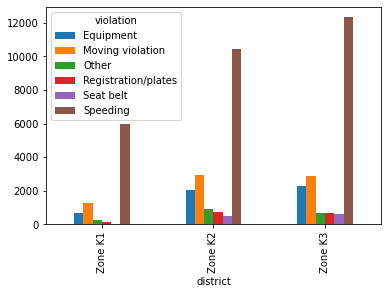

In [11]:
# Create a bar plot of 'k_zones'
k_zones.plot(kind='bar')

# Display the plot
plt.show()

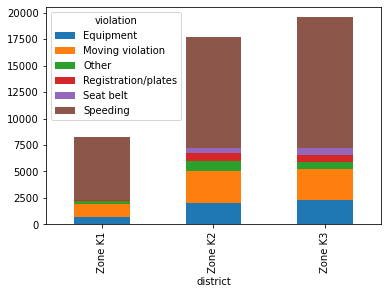

In [12]:
# Create a stacked bar plot of 'k_zones'
k_zones.plot(kind='bar', stacked=True)

# Display the plot
plt.show()

### How long might you be stopped for a violation?

In [13]:
# Print the unique values in 'stop_duration'
print(RI_traffic_prepd.stop_duration.unique())

# Create a dictionary that maps strings to integers
mapping = {'0-15 Min':8, '16-30 Min':23, '30+ Min':45}

# Convert the 'stop_duration' strings to integers using the 'mapping'
RI_traffic_prepd['stop_minutes'] = RI_traffic_prepd.stop_duration.map(mapping)

# Print the unique values in 'stop_minutes'
print(RI_traffic_prepd.stop_minutes.unique())

['0-15 Min' '16-30 Min' nan '30+ Min']
[ 8. 23. nan 45.]


violation_raw
APB                                 17.967033
Call for Service                    22.140805
Equipment/Inspection Violation      11.445340
Motorist Assist/Courtesy            17.741463
Other Traffic Violation             13.844490
Registration Violation              13.736970
Seatbelt Violation                   9.662815
Special Detail/Directed Patrol      15.123632
Speeding                            10.581509
Suspicious Person                   14.910714
Violation of City/Town Ordinance    13.254144
Warrant                             24.055556
Name: stop_minutes, dtype: float64


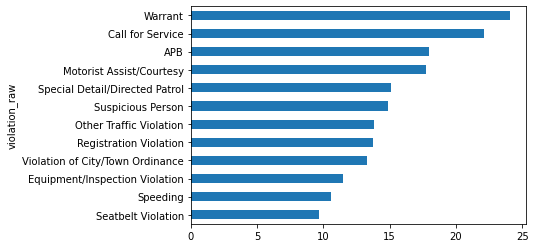

In [14]:
# Calculate the mean 'stop_minutes' for each value in 'violation_raw'
print(RI_traffic_prepd.groupby('violation_raw').stop_minutes.mean())

# Save the resulting Series as 'stop_length'
stop_length = RI_traffic_prepd.groupby('violation_raw').stop_minutes.mean()

# Sort 'stop_length' by its values and create a horizontal bar plot
stop_length.sort_values().plot(kind='barh')

# Display the plot
plt.show()